# Curvature viewer

This notebook presents how to use the [`pychemcurv.vis.CurvatureViewer`](https://pychemcurv.readthedocs.io/en/latest/visualization.html#curvatureviewer-class) 
class in order to visualize the atomic (local) geometrical quantities mapped on the structure.

In [1]:
import numpy as np
import pymatgen as mg
from pychemcurv import CurvatureAnalyzer, CurvatureViewer

## Molecule
---


In [2]:
mol = mg.Molecule.from_file("./C32-C2-1.xyz")

### Compute and display atomic properties

First we compute the atomic (local) geometrical quantities and look at the value in a table.
This is done using the [`pychemcurv.CurvatureAnalyze`](https://pychemcurv.readthedocs.io/en/latest/analysis.html#curvatureanalyzer-class) class.

In [3]:
ca = CurvatureAnalyzer(mol)
ca.data[["atom_idx", "species", "pyrA", "spherical_curvature", "angular_defect"]].head()

atom_idx species       pyrA  spherical_curvature  angular_defect
0         0       C  19.037993             0.454660       30.311035
1         1       C  18.401262             0.433454       28.737243
2         2       C  23.005967             0.538896       42.850794
3         3       C  13.128629             0.314696       15.149612
4         4       C  13.128629             0.314696       15.149612

In [4]:
ca.data[["pyrA", "spherical_curvature", "angular_defect"]].describe().transpose()

count       mean       std        min        25%  \
pyrA                  32.0  16.460797  2.719458  12.479392  14.311775   
spherical_curvature   32.0   0.391193  0.063039   0.297761   0.341859   
angular_defect        32.0  23.703247  7.375648  13.792462  17.852590   

                           50%        75%        max  
pyrA                 16.544267  18.160402  23.005967  
spherical_curvature   0.392907   0.431639   0.538896  
angular_defect       23.531796  28.115914  42.850794

### Visualization of the data mapped on the structure

Using the [`pychemcurv.vis.CurvatureViewer`](https://pychemcurv.readthedocs.io/en/latest/visualization.html#curvatureviewer-class) class 
we visualize the value of `pyrA` using a color scale on the structure.

In [5]:
cv = CurvatureViewer(mol)
view = cv.map_view(prop="pyrA", cm="ocean_r")
view

_ColormakerRegistry()

The `NGLWidget` is the first element of the children of the widget. In order to display and integrate the image in a notebook, you have first to call the `render_image()` method and then the `_display_image()`.

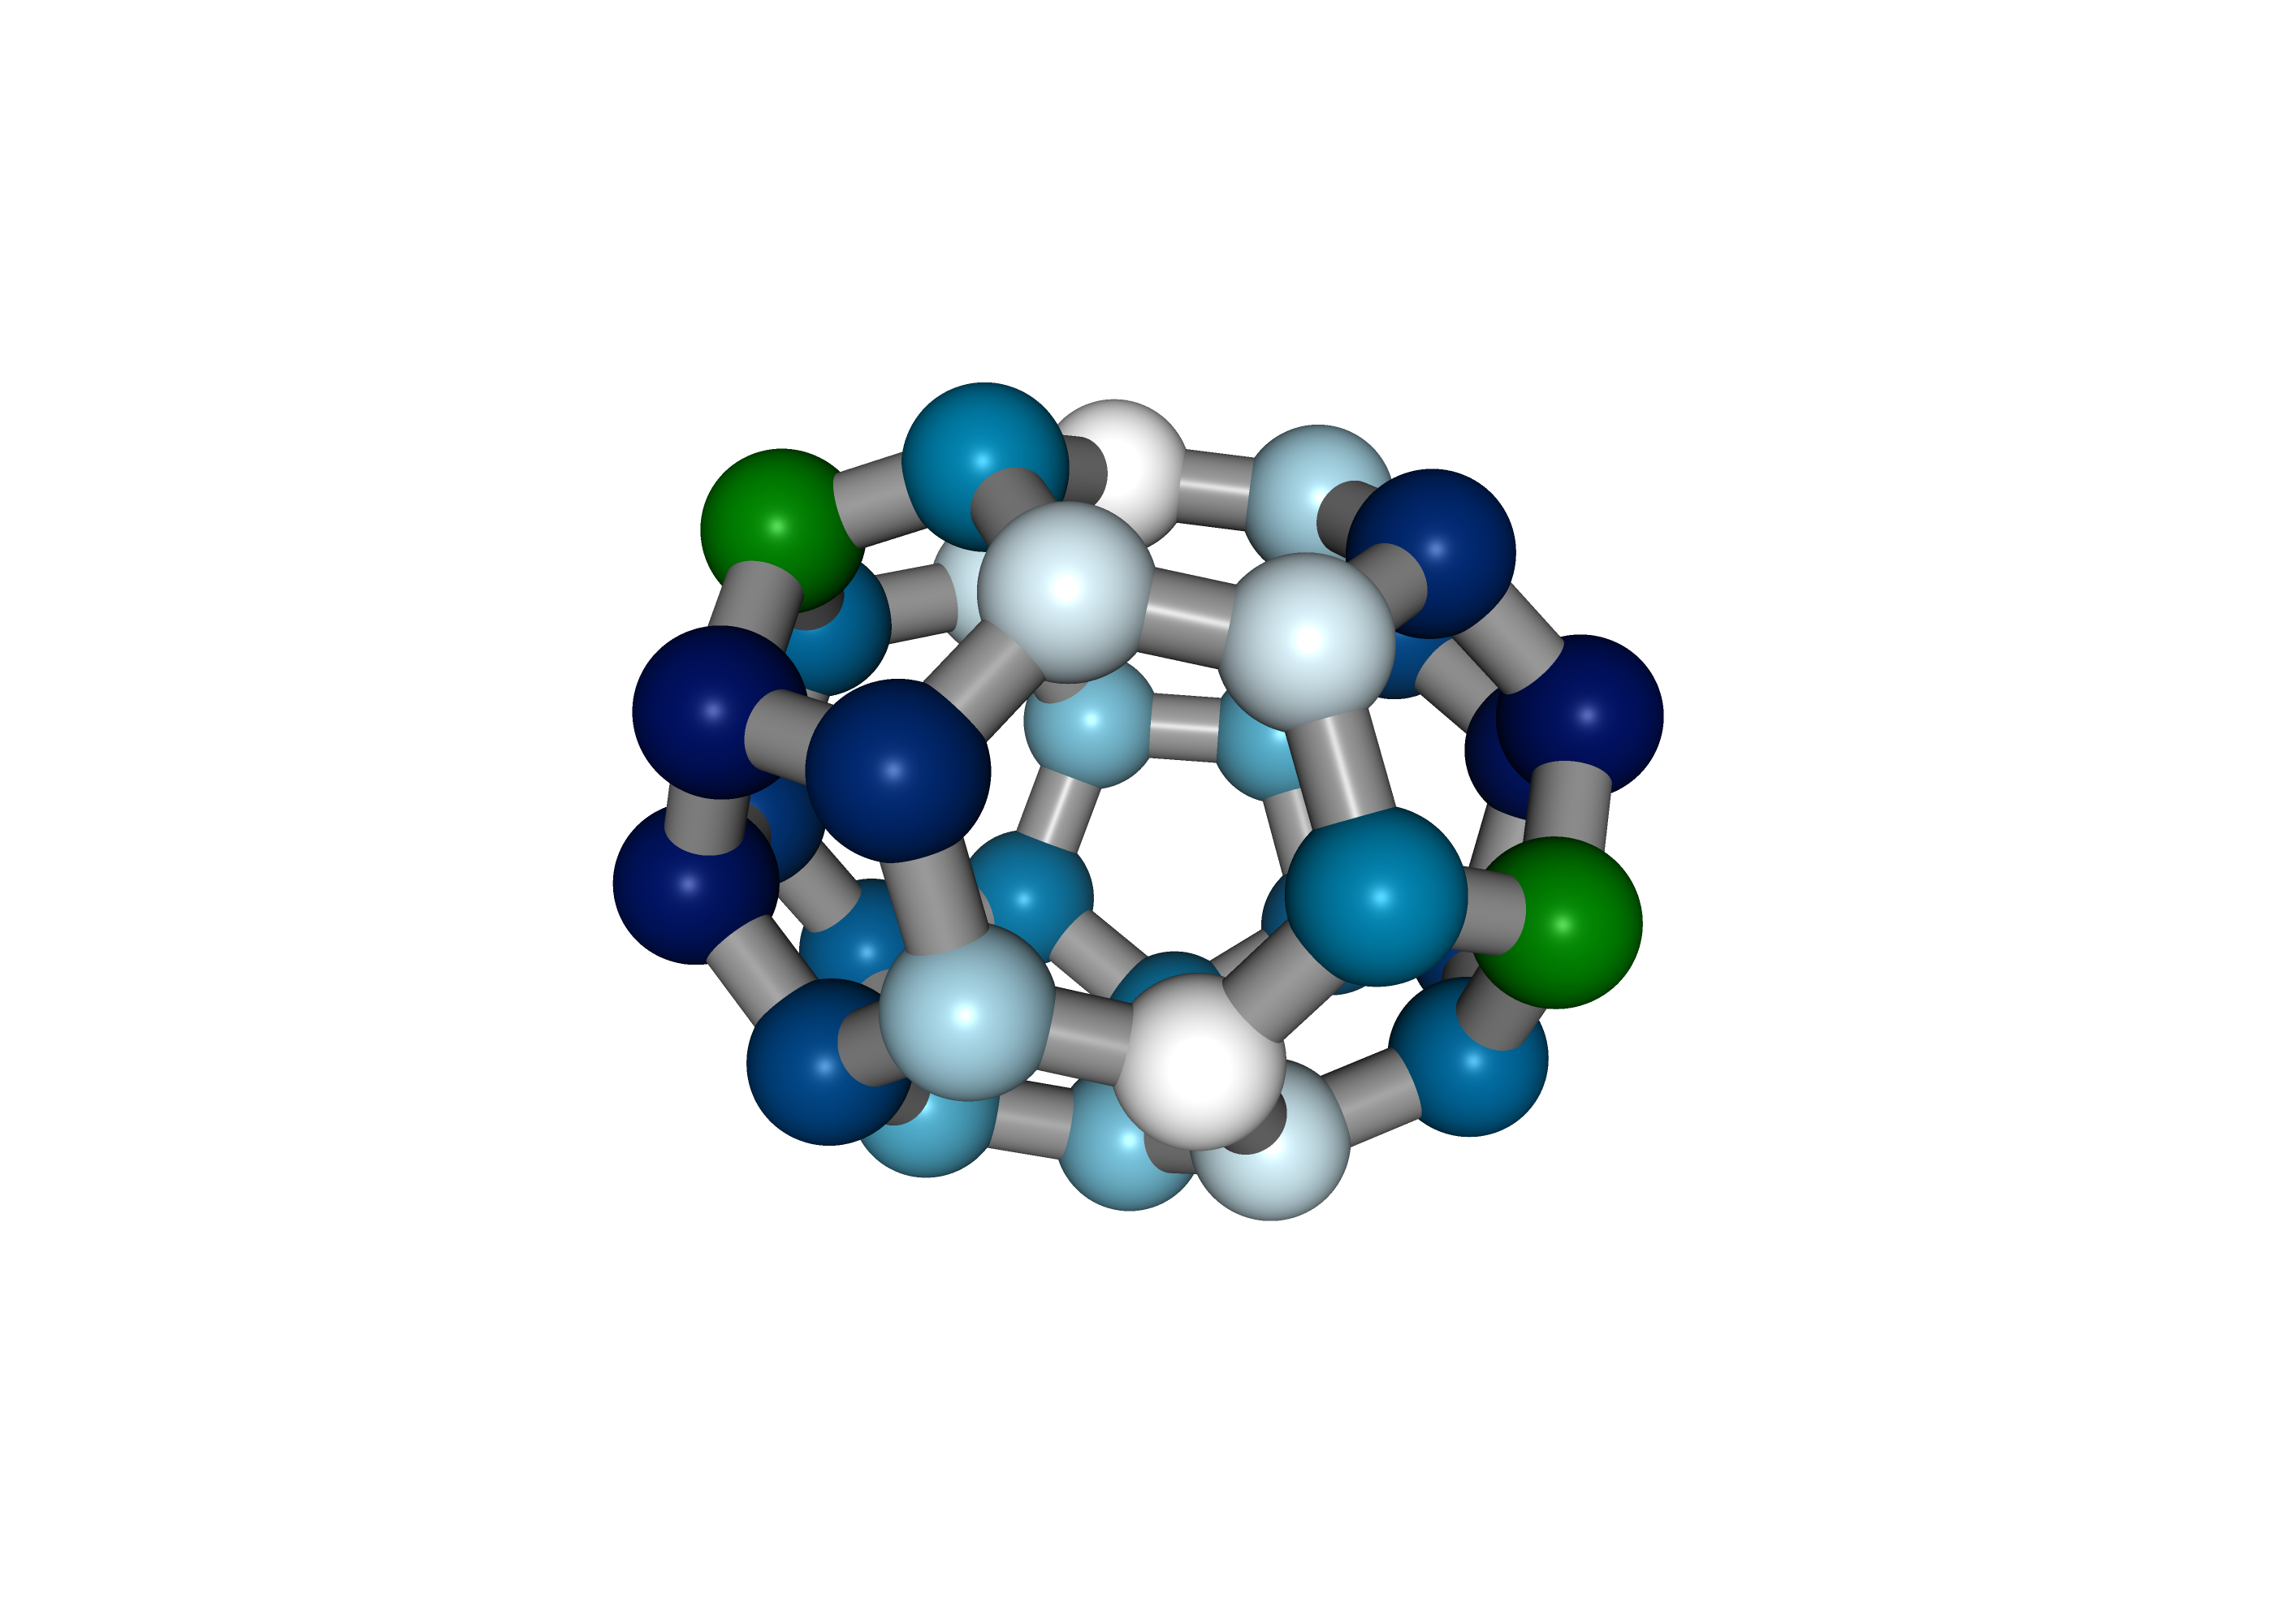

In [43]:
#view.children[0].render_image()
view.children[0]._display_image()

### Change the color scale

In the C60 fullerene, the value of the pyramidalization angle is 11.6°. Hereafter, we changed the colorscale to be symmetric with respecto to this value. Then, the pyramidalization of red atoms is larger than in the C60 fulleren, whereas the pyramidalization angle of blue atoms is smaller.

In [6]:
cv = CurvatureViewer(mol)
view = cv.map_view(prop="pyrA", cm="bwr", minval=0, maxval=23.2)
view

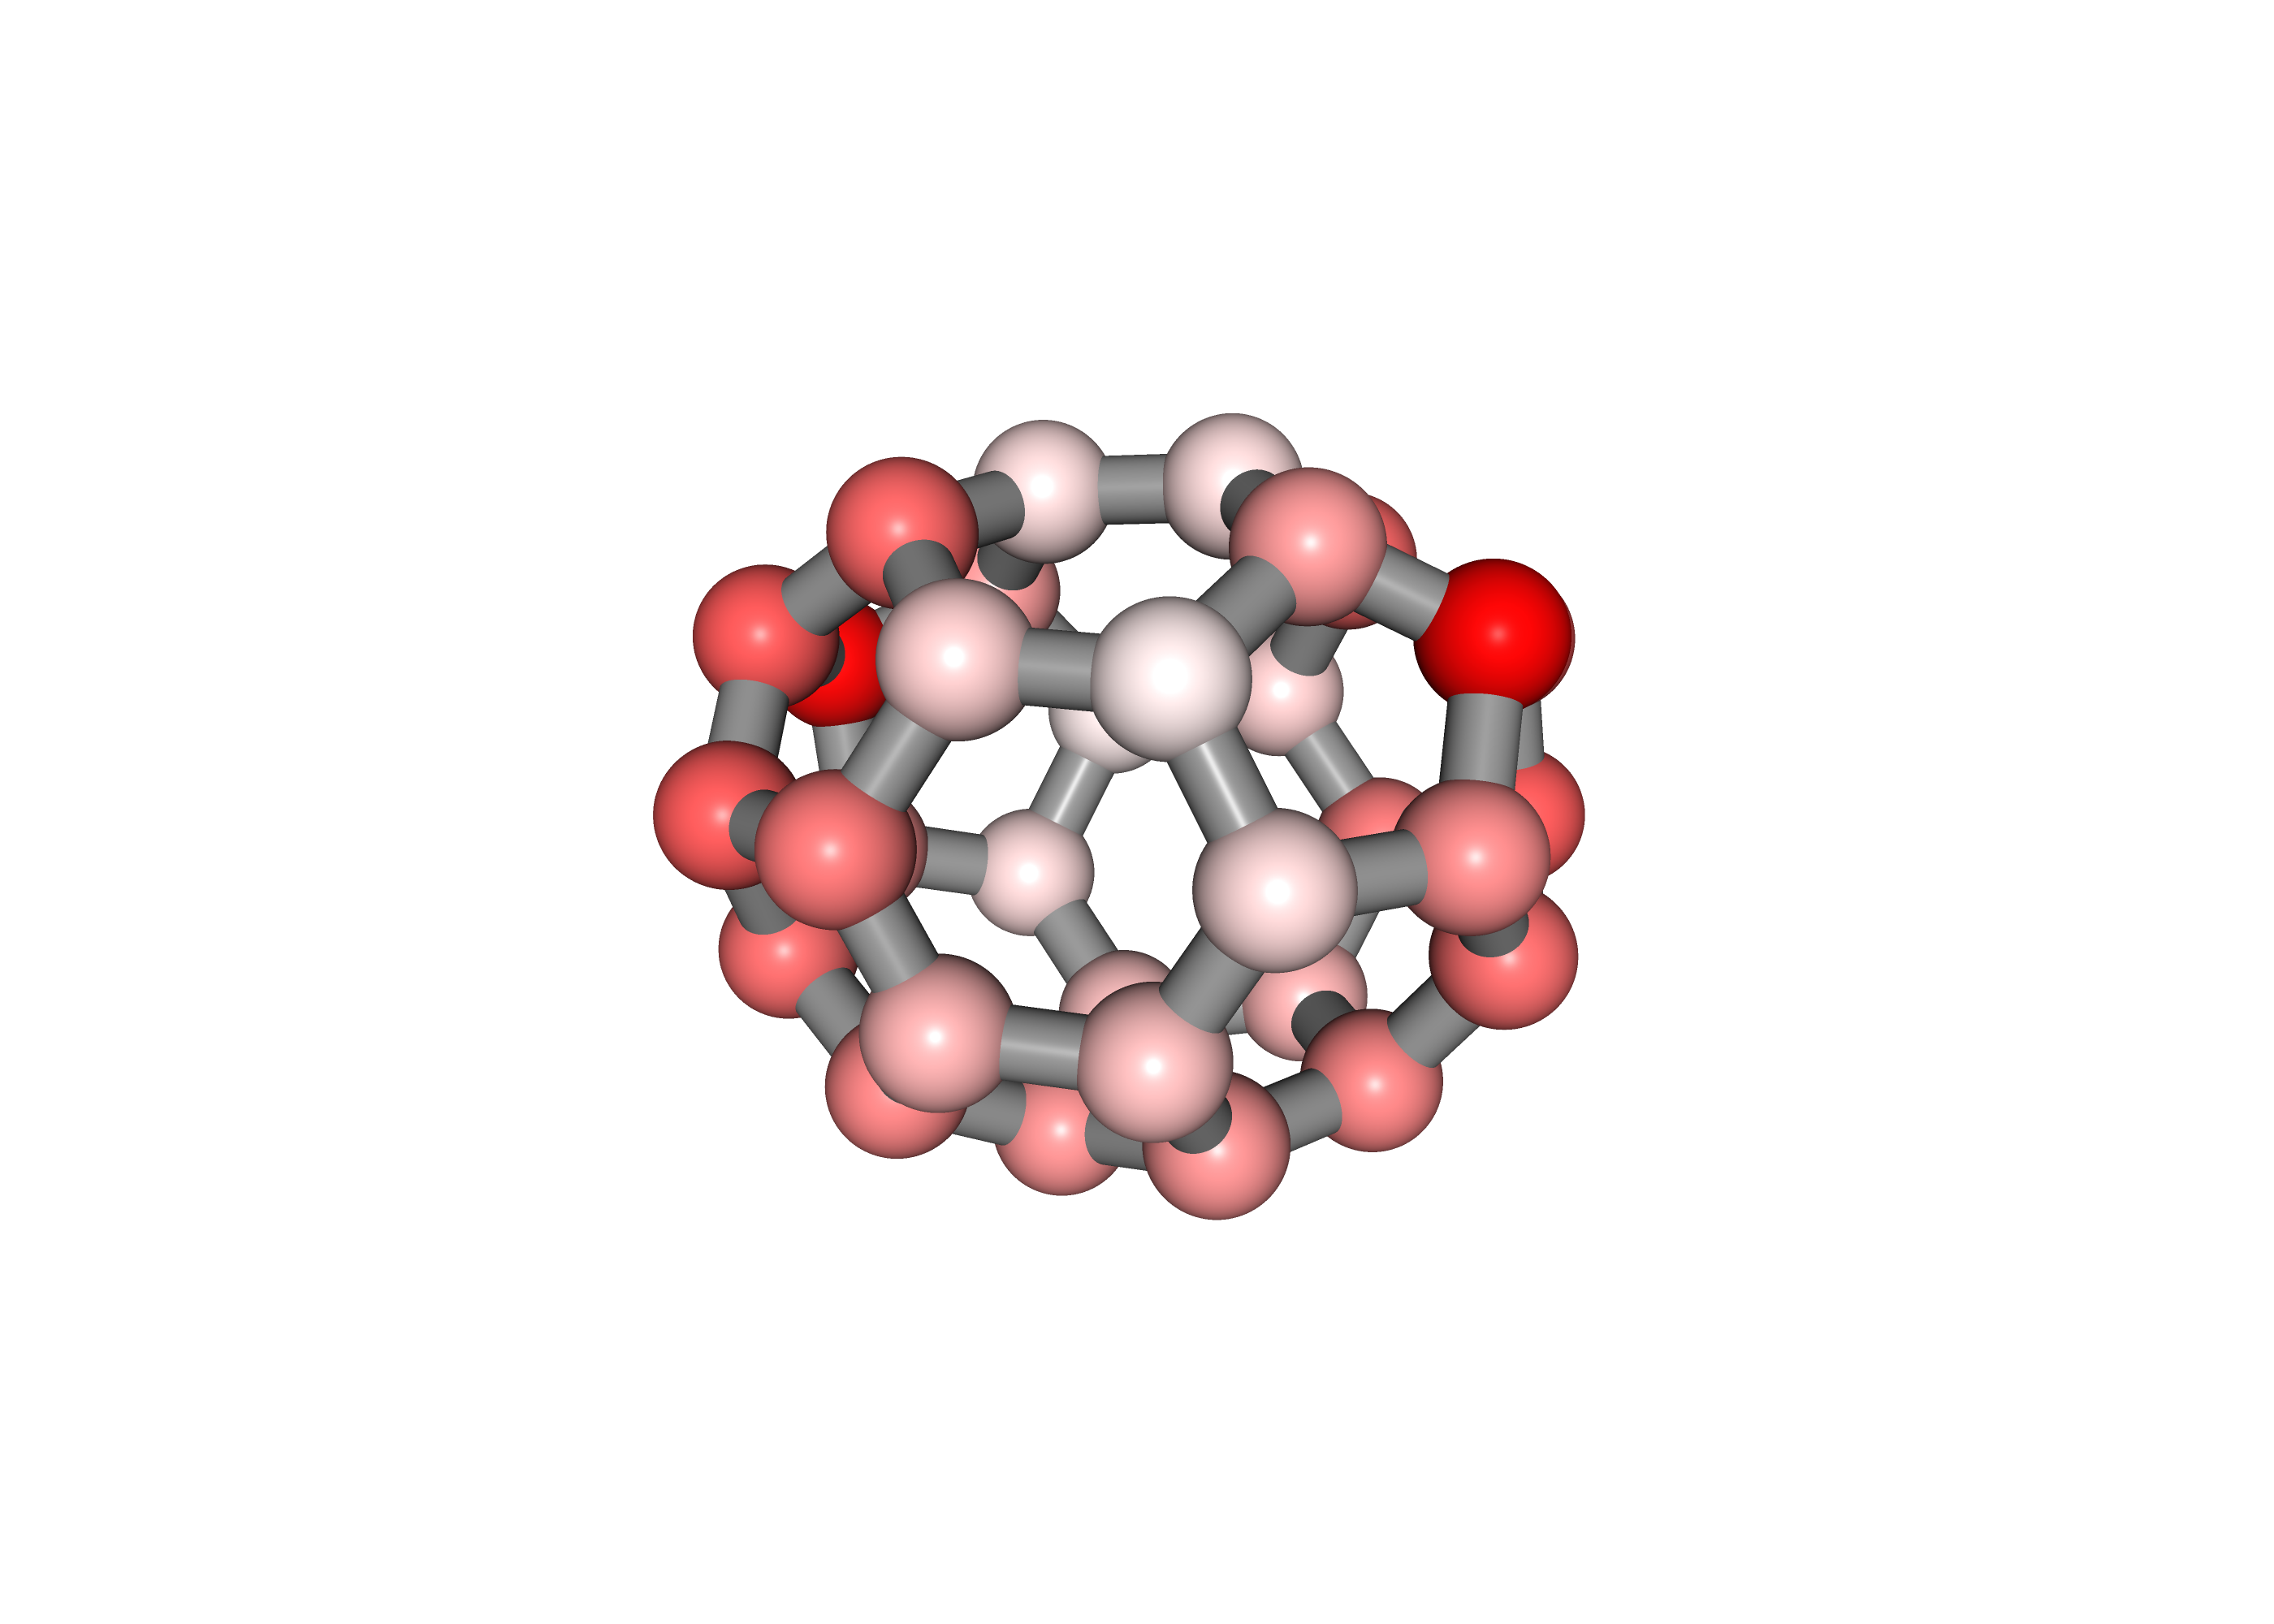

In [46]:
#view.children[0].render_image()
view.children[0]._display_image()

Look at the results on another example.

In [9]:
# load the structure
molC80 = mg.Molecule.from_file("./C80-D5d-1.xyz")
cv80 = CurvatureViewer(molC80)

# set up boundaries
pyrA_C60 = 11.6
minval = np.nanmin(cv80.data.pyrA)
maxval = np.nanmax(cv80.data.pyrA)
delta = max(pyrA_C60 - minval, maxval - pyrA_C60)

# visualize
view = cv80.map_view(prop="pyrA", cm="bwr", radius=.2, aspect_ratio=2,
                     minval=pyrA_C60 - delta, maxval=pyrA_C60 + delta)
view

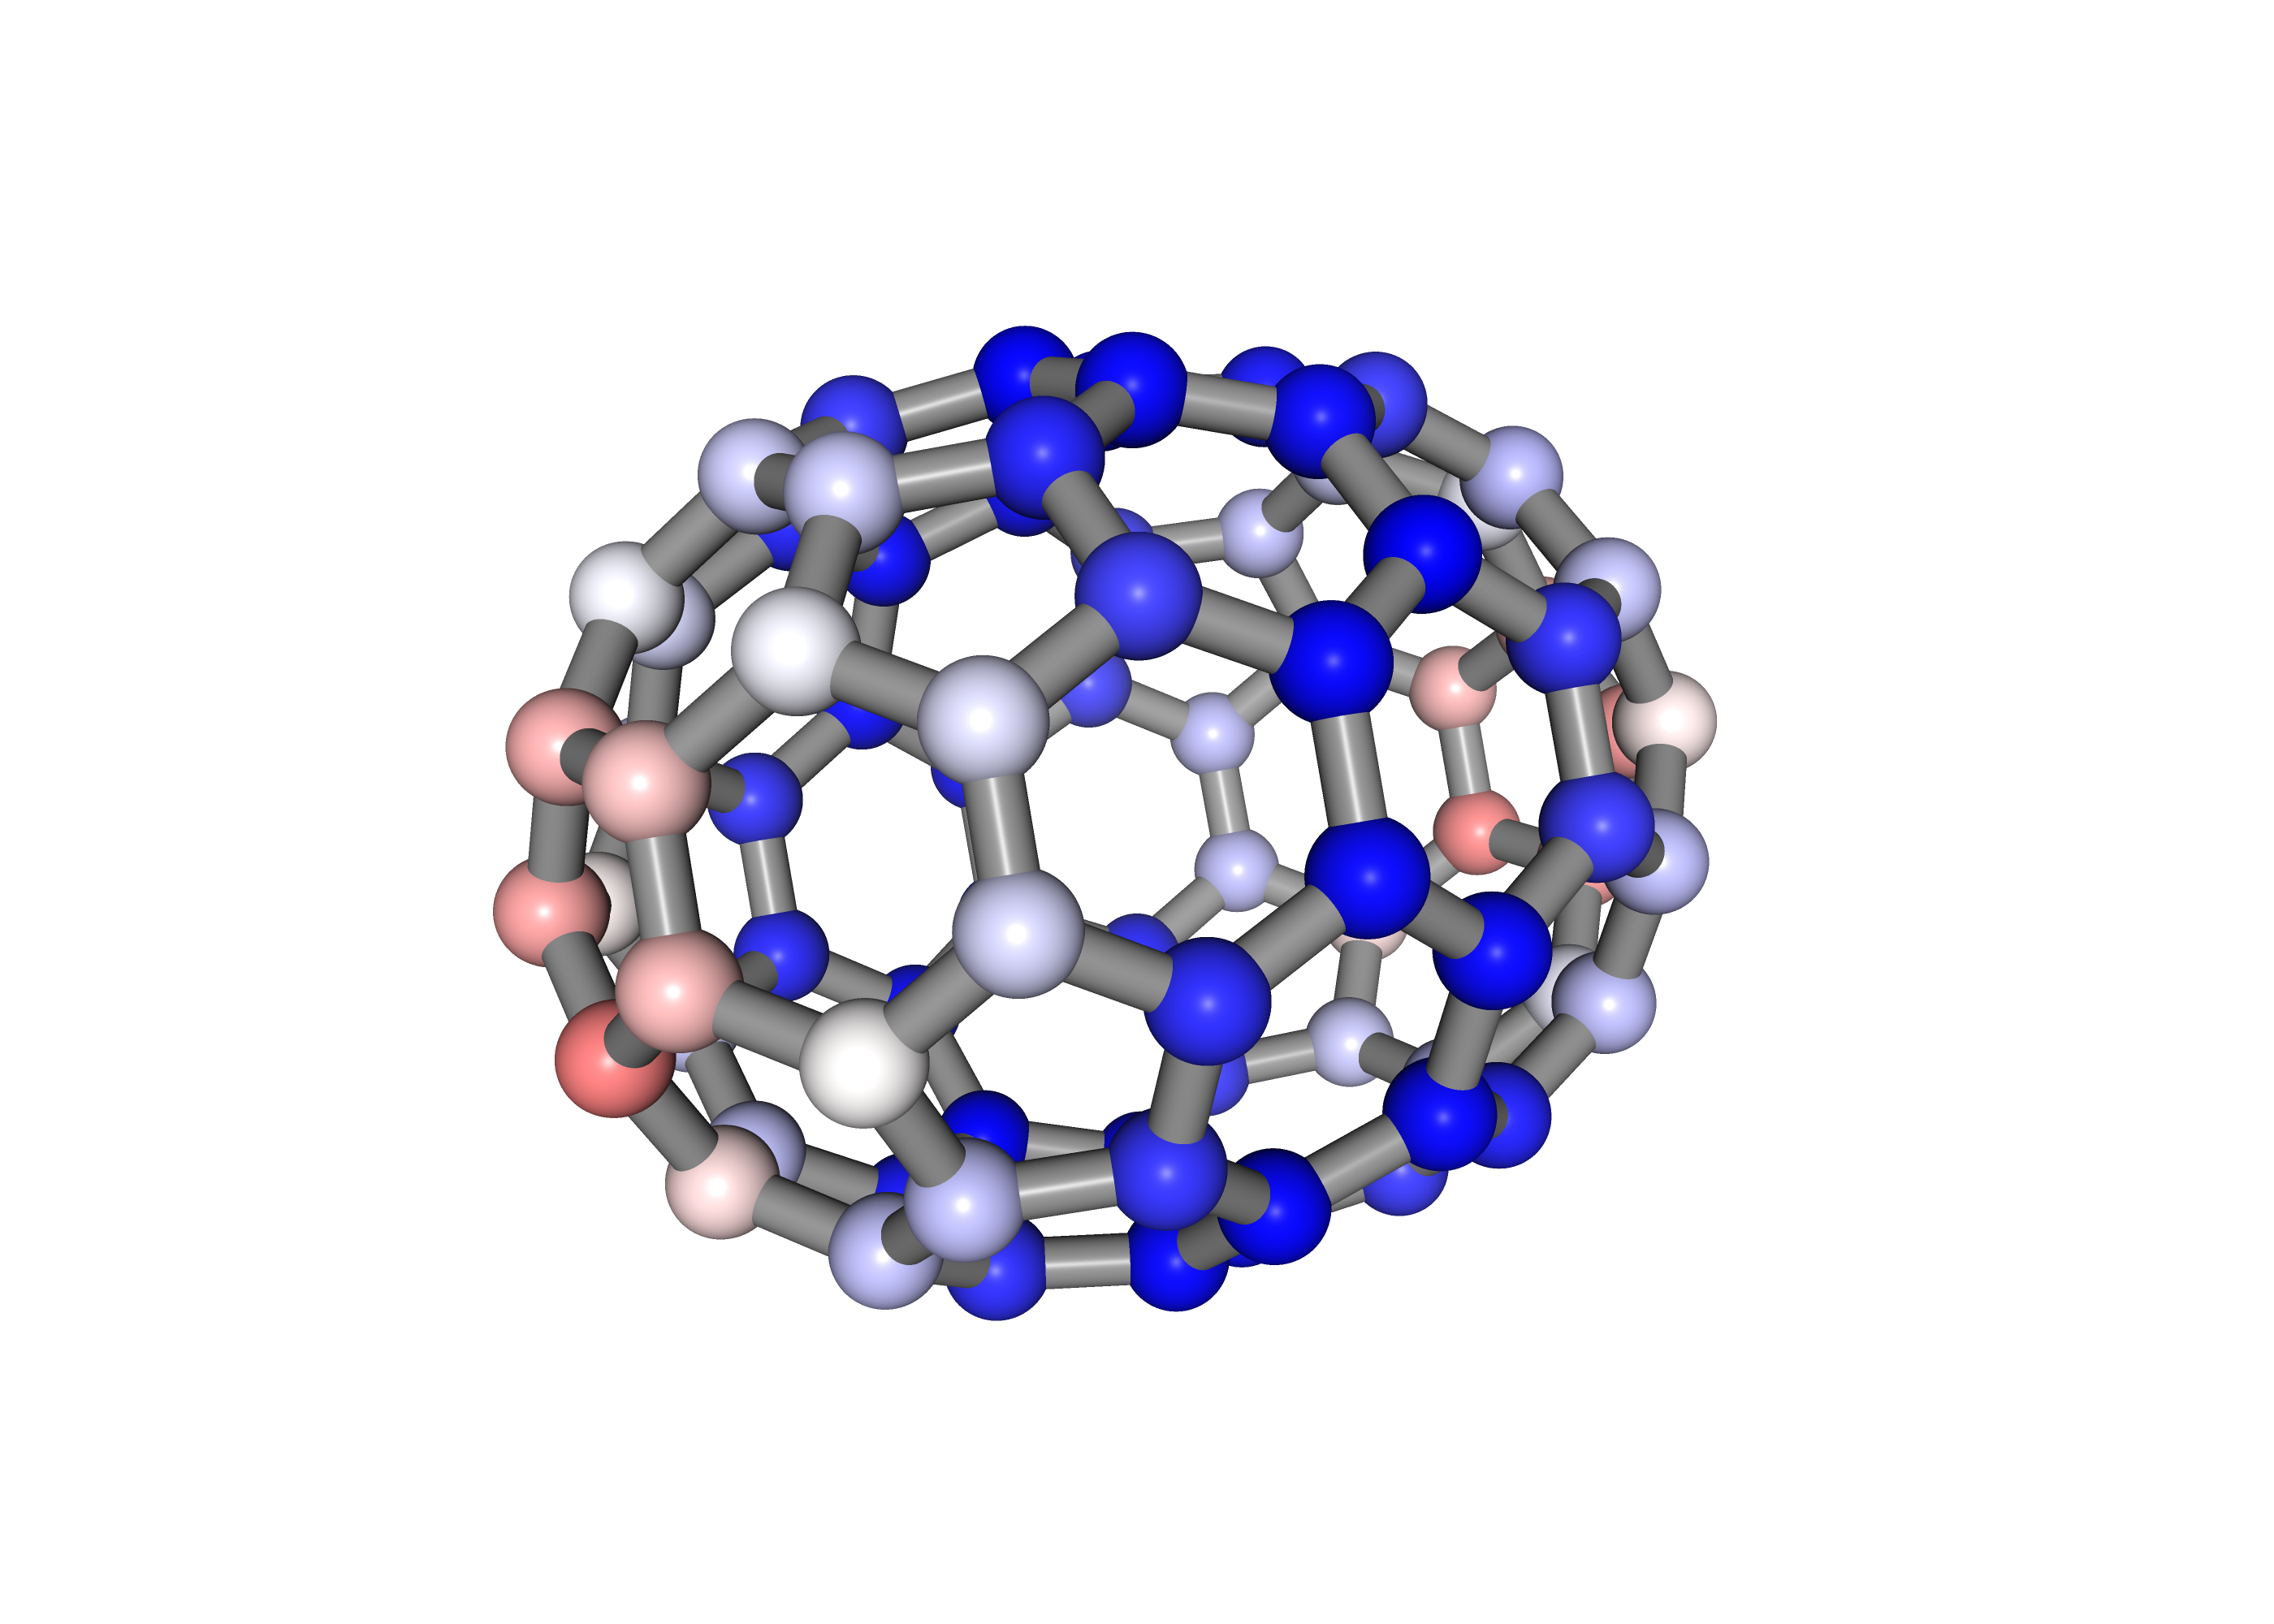

In [49]:
#view.children[0].render_image()
view.children[0]._display_image()

You can download an image using the following line:

In [50]:
view.children[0].download_image(factor=10, filename="pyrA_C80.png", trim=True)

## Periodic structure case

---

### Load the structure

In [5]:
struct = mg.Structure.from_file("5.7GPa.POSCAR.vasp")
ca = CurvatureAnalyzer(struct)
ca.data[["atom_idx", "species", "pyrA", "spherical_curvature", "angular_defect"]].head()

atom_idx species       pyrA  spherical_curvature  angular_defect
0         0       C   5.055849             0.124138        2.303479
1         1       C   5.040057             0.123848        2.289201
2         2       C   5.055849             0.124138        2.303479
3         3       C  11.420852             0.040246      121.201008
4         4       C   5.040057             0.123848        2.289201

In [6]:
ca.data[["pyrA", "spherical_curvature", "angular_defect"]].describe().transpose()

count       mean        std       min       25%  \
pyrA                 128.0   4.931813   2.719061  1.572961  3.140868   
spherical_curvature  128.0   0.076472   0.038096  0.012839  0.040231   
angular_defect       128.0  31.275827  51.953126  0.224248  0.892464   

                          50%        75%         max  
pyrA                 4.653972   5.512312   12.434130  
spherical_curvature  0.077291   0.118786    0.135466  
angular_defect       2.104627  32.135651  121.550475

### Visualization

In [14]:
cv_NT = CurvatureViewer(struct)

view = cv_NT.map_view(prop="pyrA", unitcell=True)
# view.children[0].camera = "orthographic"
view

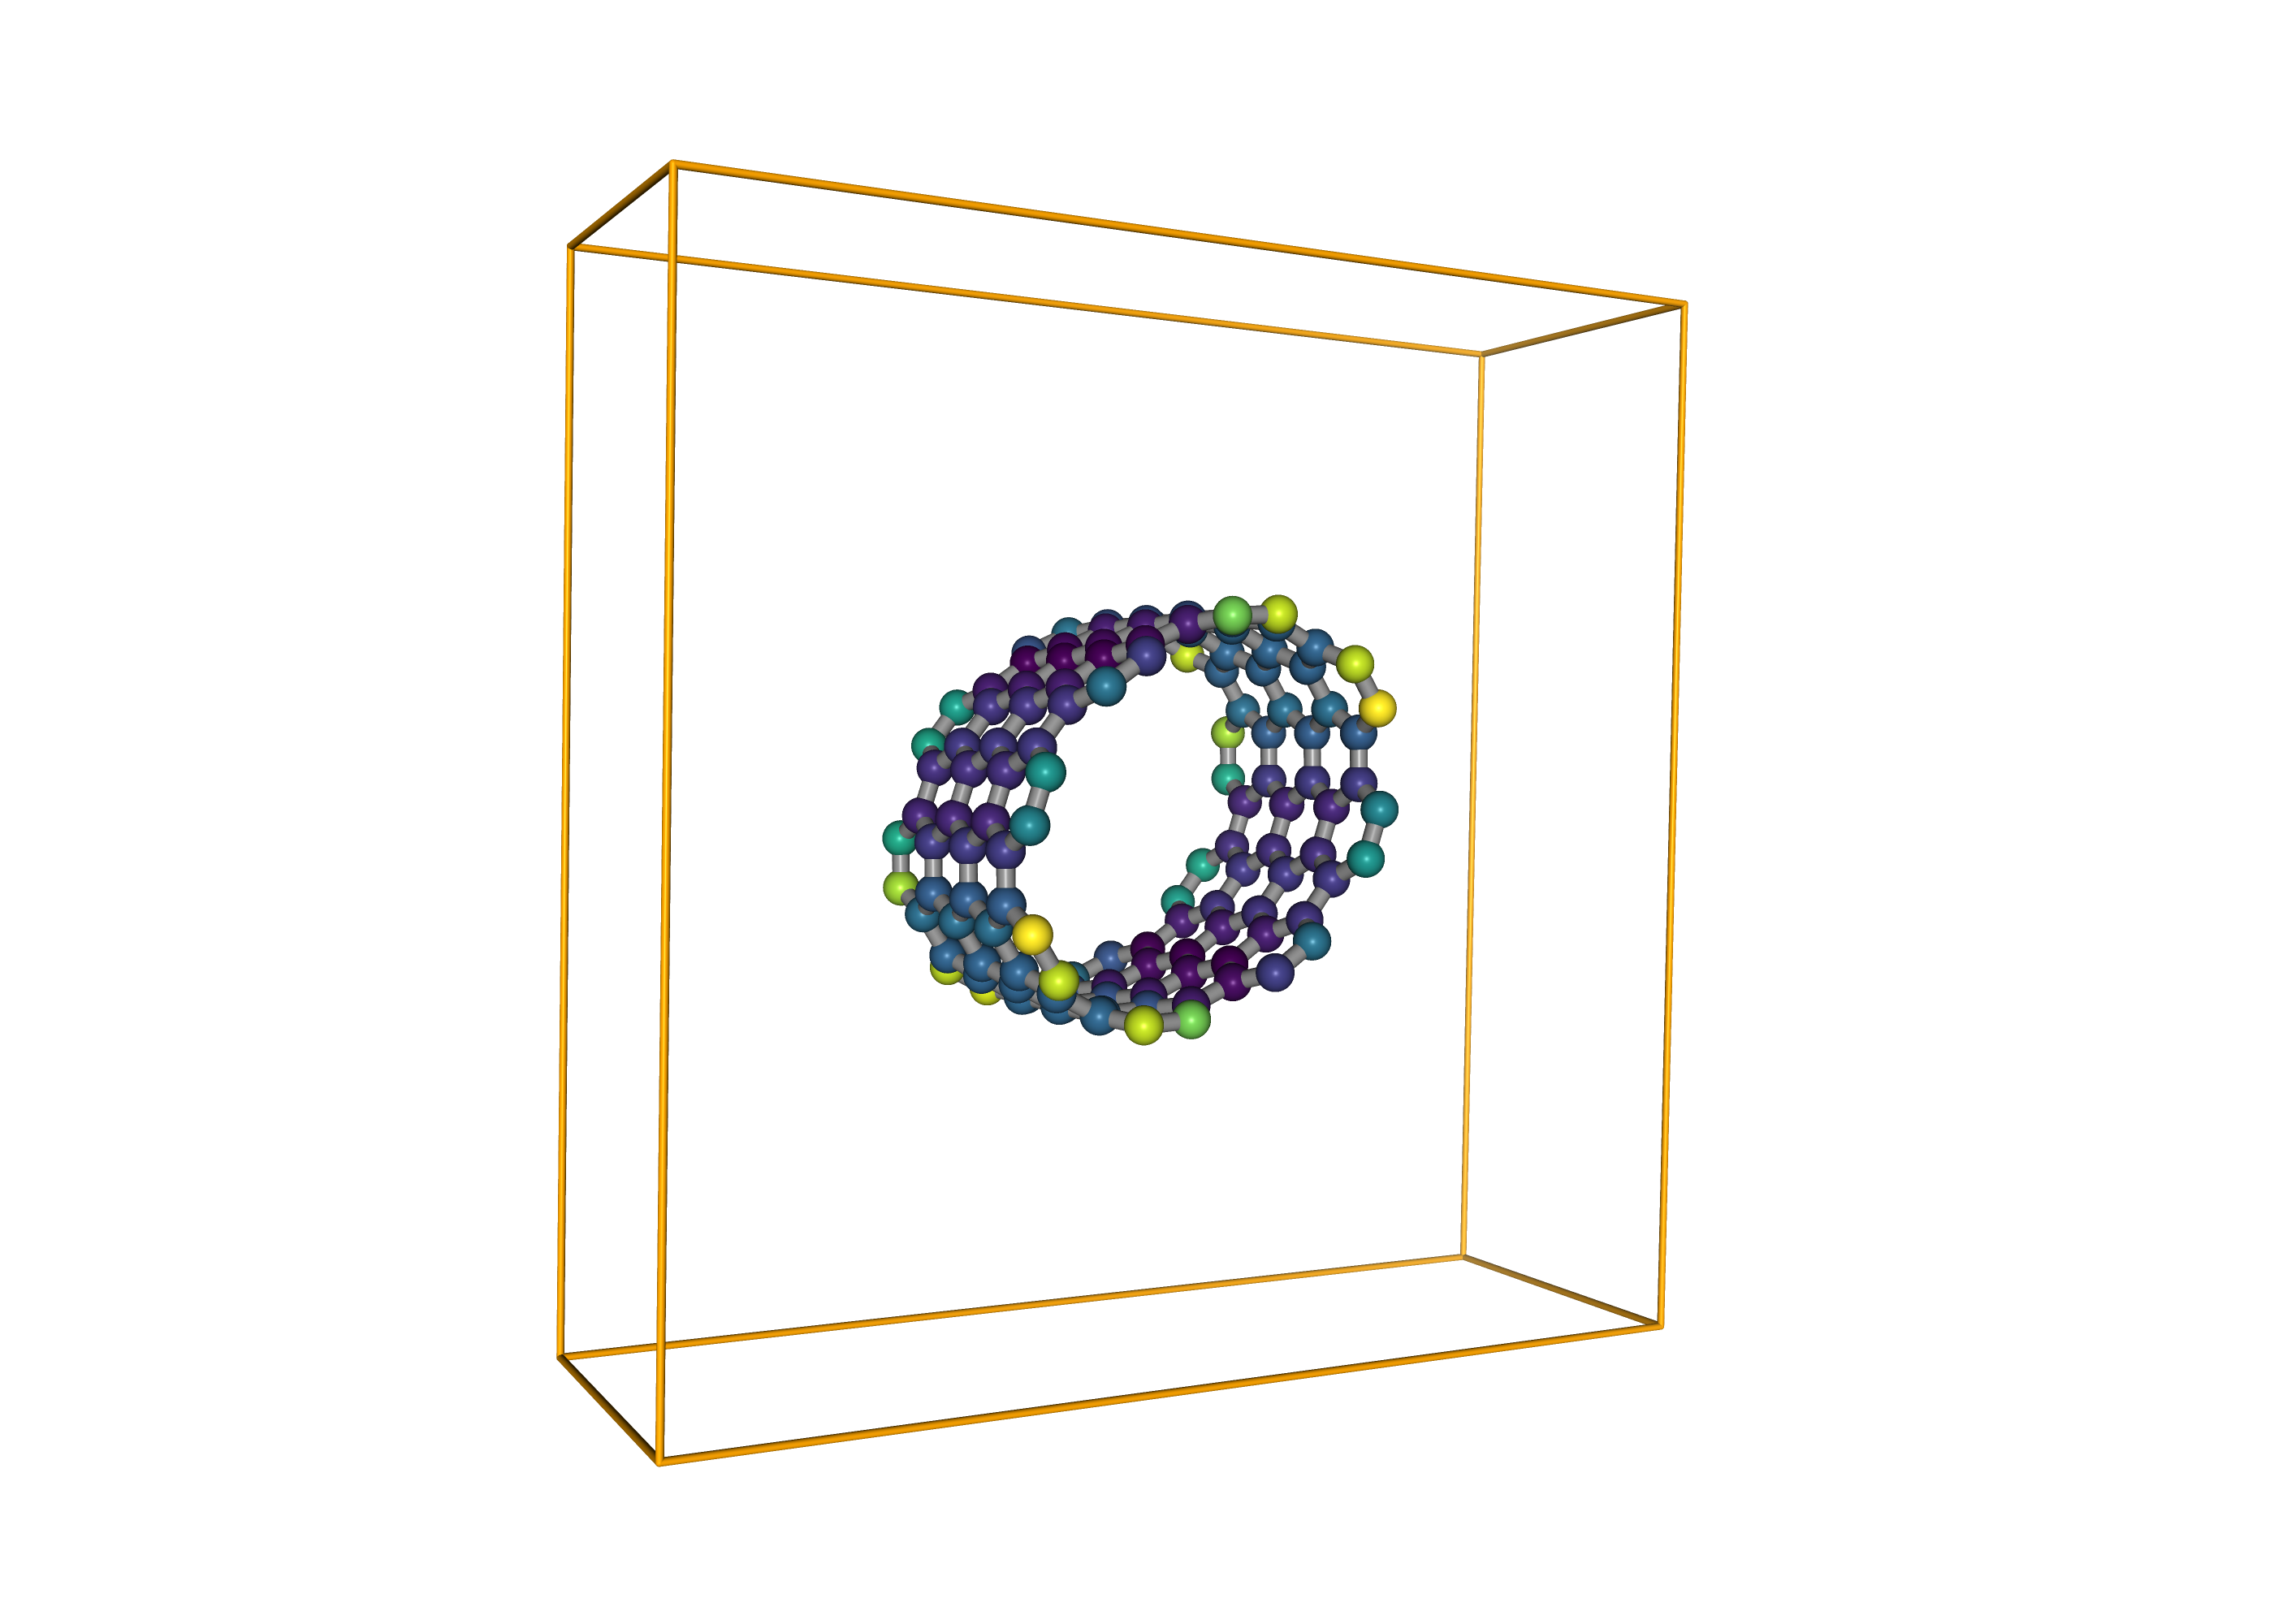

In [17]:
#view.children[0].render_image()
view.children[0]._display_image()

In [22]:
view.download_image(factor=10, filename="cnt.png", trim=True)